In [135]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

from tensorflow.keras import optimizers

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [136]:
img_width = 150
img_height = 150

train_data_dir = 'image_data/training'
validation_data_dir = 'image_data/validation'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [137]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [138]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [139]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [140]:
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [141]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 91 images belonging to 2 classes.


In [142]:
print(train_generator.class_indices)


{'Cat': 0, 'Dog': 1}


In [143]:
imgs, labels = next(train_generator)


In [148]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
0.0


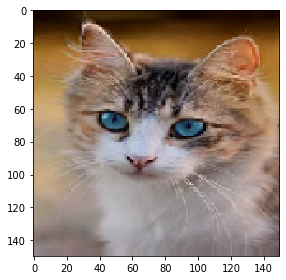

0.0


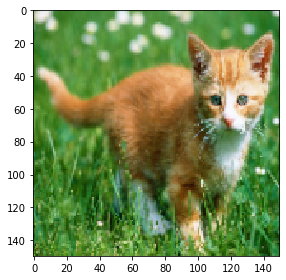

0.0


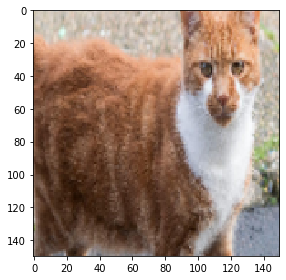

1.0


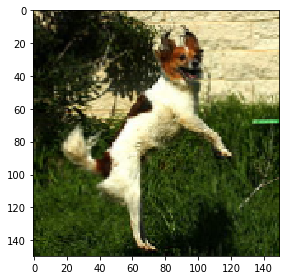

1.0


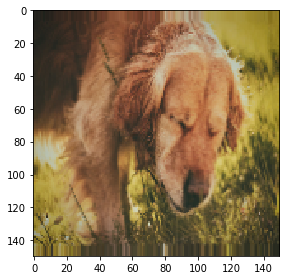

0.0


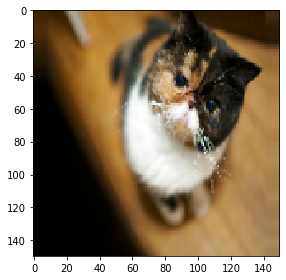

0.0


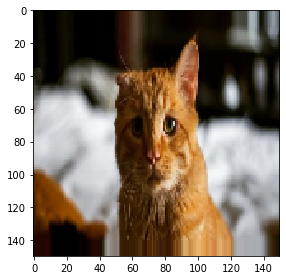

1.0


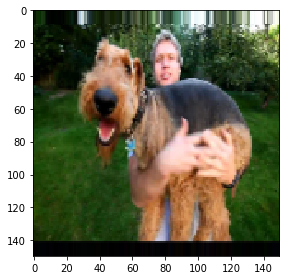

1.0


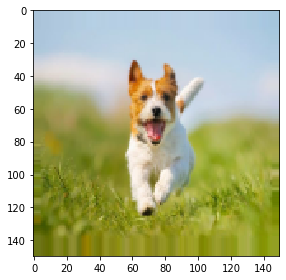

1.0


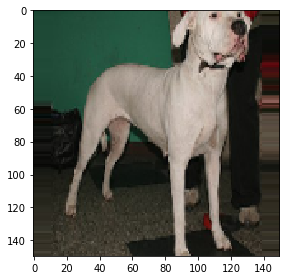

0.0


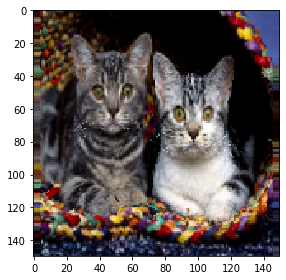

0.0


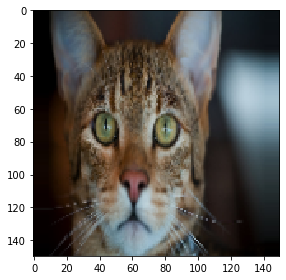

1.0


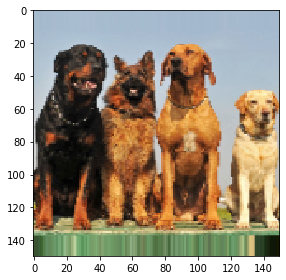

0.0


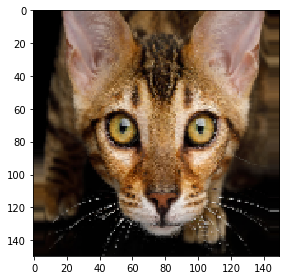

0.0


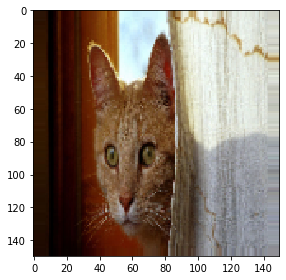

1.0


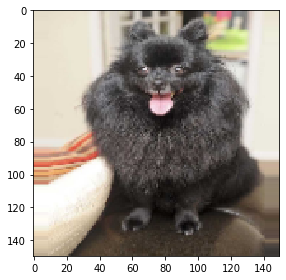

0.0


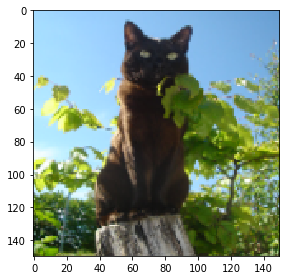

0.0


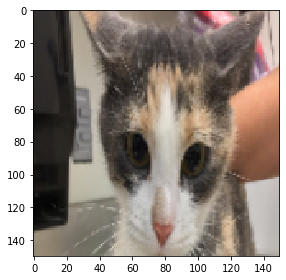

0.0


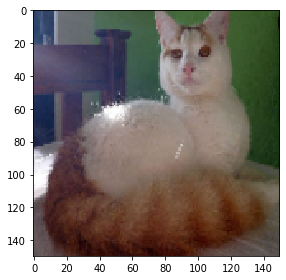

0.0


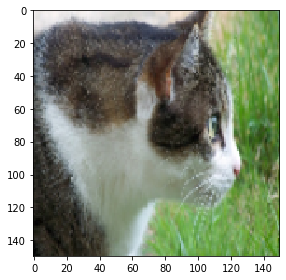

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [150]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 91 images belonging to 2 classes.


In [155]:
history = model.fit(
    train_generator,
    steps_per_epoch=5 // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 1 steps
Epoch 1/5
5/5 [==============================] - 5s 933ms/step - loss: 0.6796 - accuracy: 0.6044 - val_loss: 0.6830 - val_accuracy: 0.8000
Epoch 2/5
5/5 [==============================] - 5s 1s/step - loss: 0.6986 - accuracy: 0.4835 - val_loss: 0.6931 - val_accuracy: 0.3500
Epoch 3/5
5/5 [==============================] - 6s 1s/step - loss: 0.6958 - accuracy: 0.4615 - val_loss: 0.6913 - val_accuracy: 0.3500
Epoch 4/5
5/5 [==============================] - 6s 1s/step - loss: 0.6710 - accuracy: 0.5934 - val_loss: 0.6790 - val_accuracy: 0.8000
Epoch 5/5
5/5 [==============================] - 5s 1s/step - loss: 0.6802 - accuracy: 0.6154 - val_loss: 0.6736 - val_accuracy: 0.7500


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


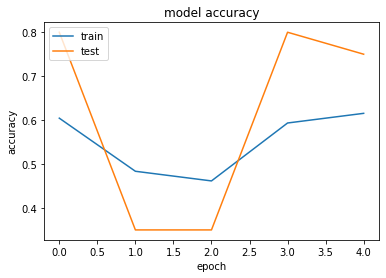

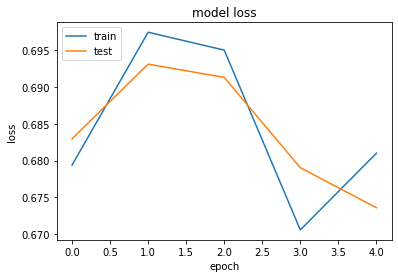

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [158]:

## Now Predict
predict_dir_path='image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['dog.21.jpg', 'cat.0.jpg', 'cat.1.jpg', 'dog.5.jpg']


In [160]:
from tensorflow.keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

dog.21.jpg: dog
cat.0.jpg: dog
cat.1.jpg: cat
dog.5.jpg: dog
Total Dogs : 3
Total Cats : 1
